Moyenne des différences entre les minimum : -294.9068125
Moyenne des différences entre les extréma : -606.1886666666668


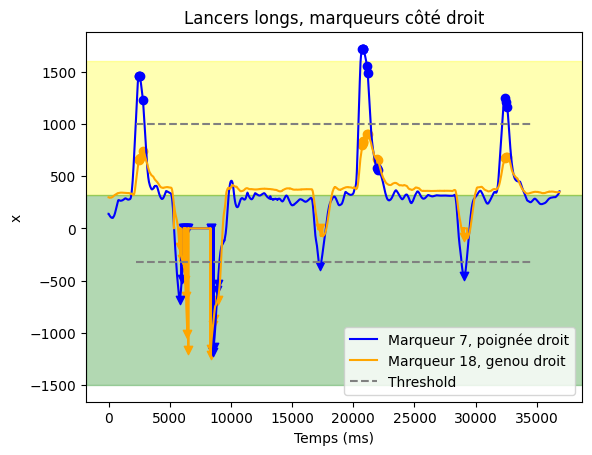

Moyenne des différences entre les minimum : 138.19445454545456
Moyenne des différences entre les extréma : -419.5475


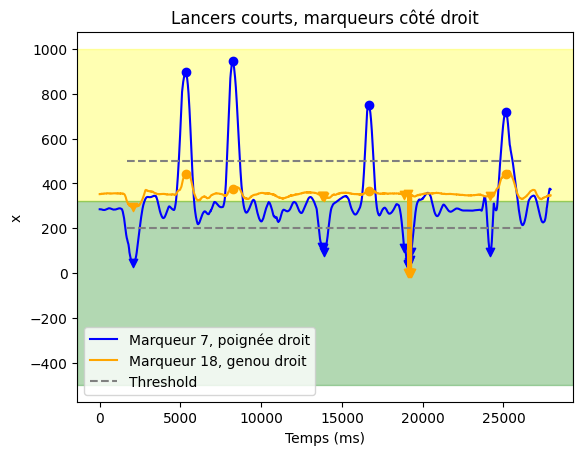

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

#FONCTIONS
def splitmatrix(filename):
    with open(filename, 'r') as file:
        data = file.read()

    # Séparation des valeurs en lignes et colonnes
    lines = data.strip().split('\n')
    matrix = [list(map(float, line.split())) for line in lines]

    # Convertir en matrice numpy
    matrix_np = np.array(matrix)

    matrix2 = matrix_np.transpose()
    l= []

    for i in range(0,14) : 
        #print(i, i*3,i+1,(i+1)*3)
        #print(len(matrix_np[i*3,(i+1)*3]))
        l.append(matrix2[i*3:((i+1)*3)])
    
    #print(l)
    
    mbressup= l[0:8]
    mbresinf= l[9::]   
    return (l, mbressup,mbresinf)


#TEMPS
def extract_local_maxima_time_differences(x1, x2, thresholdchoice=1000): #x2-x1
    def extract_local_maxima(x, threshold):
        from scipy.signal import find_peaks

        peaks, _ = find_peaks(x, height=thresholdchoice)
        return peaks

    peaks_M1_indices = extract_local_maxima(x1, threshold=thresholdchoice)
    peaks_M2_indices = extract_local_maxima(x2, threshold=thresholdchoice)

    # Trouver tous les pics, y compris ceux qui ne sont pas communs
    all_peaks_indices = np.union1d(peaks_M1_indices, peaks_M2_indices)

    # Extraire les valeurs des pics à partir des indices
    peaks_M1 = x1[all_peaks_indices]
    peaks_M2 = x2[all_peaks_indices]

    # Calculer la différence de temps entre chaque paire de pics
    #time_differences =peaks_M2_indices-peaks_M1_indices

    # Calculer la moyenne de la différence de temps
    #average_time_difference = np.mean(time_differences)
    
    # Calculer la différence entre chaque paire d'extréma
    differences_between_peaks = peaks_M2 - peaks_M1
    average_difference_between_peaks = np.mean(differences_between_peaks)
    
    return all_peaks_indices, peaks_M1, peaks_M2, average_difference_between_peaks 



l=splitmatrix("groupe3_004_2023_11_23_Marker.txt")[0]

M7=l[5]
x7=M7[0]
y7=M7[1]
z7=M7[2]

M18= l[13]
x18 = M18[0]
Y18 = M18[1]
Z18 = M18[2]

all_peaks_indices, peaks_M7, peaks_M18, average_differencepeaksM7M18 =extract_local_maxima_time_differences(x7, x18, 500)

all_minima_indices=extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=320)[0]
minima_M7= -extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=320)[1]
minima_M18 = -extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=320)[2]
average_difference_between_minimaM7M18=-extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=320)[3]

temps = [i*10 for i in range(0,len(x18))]

print ("Moyenne des différences entre les minimum :", average_difference_between_minimaM7M18)
print ("Moyenne des différences entre les extréma :",average_differencepeaksM7M18)

plt.axhspan(320, 1600, color='yellow', alpha=0.3) #, label='mouvement à droite '
plt.axhspan(-1500, 319 , color='green', alpha=0.3) #, label='mouvement à gauche'
# j'ai pas éverifié si c'était bien en haut = moivement à droite et vice versa

plt.plot(temps, x7, label = 'Marqueur 7, poignée droit', color='blue')
plt.plot(temps, x18, label = 'Marqueur 18, genou droit', color='orange')
plt.scatter(all_peaks_indices*10, peaks_M18, color='orange')#, label='Pics M18, à droite'
plt.scatter(all_peaks_indices*10, peaks_M7, color='blue') #, label='Pics M7, à droite'
plt.scatter(all_minima_indices*10, minima_M18, color='orange', marker ="v") #label='Pics M18, à gauche',
plt.scatter(all_minima_indices*10, minima_M7, color='blue', marker ="v") #label='Pics M7, à gauche'
plt.axhline(y=-320, xmin=0.1, xmax=0.9, color='grey', linestyle='--', label='Threshold')
plt.axhline(y=1000, xmin=0.1, xmax=0.9, color='grey', linestyle='--')


plt.title ('Lancers longs, marqueurs côté droit')
plt.xlabel('Temps (ms)')
plt.ylabel('x')
plt.legend()
plt.show()





l=splitmatrix("groupe3_003_2023_11_23_Marker.txt")[0]

M7=l[5]
x7=M7[0]
M18= l[13]
x18 = M18[0]

temps = [i*10 for i in range(0,len(x7))]

all_peaks_indices, peaks_M7, peaks_M18, average_differencepeaksM7M18 =extract_local_maxima_time_differences(x7, x18, 500)

all_minima_indices=extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=-200)[0]
minima_M7= -extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=-200)[1]
minima_M18 = -extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=-200)[2]
average_difference_between_minimaM7M18 =-extract_local_maxima_time_differences(-x7, -x18, thresholdchoice=-200)[3]


print ("Moyenne des différences entre les minimum :", average_difference_between_minimaM7M18)
print ("Moyenne des différences entre les extréma :",average_differencepeaksM7M18)

plt.axhspan(320, 1000, color='yellow', alpha=0.3) #, label='mouvement à droite '
plt.axhspan(-500, 319 , color='green', alpha=0.3) #, label='mouvement à gauche'
# j'ai pas éverifié si c'était bien en haut = moivement à droite et vice versa

plt.plot(temps, x7, label = 'Marqueur 7, poignée droit', color='blue')
plt.plot(temps, x18, label = 'Marqueur 18, genou droit', color='orange')
plt.scatter(all_peaks_indices*10, peaks_M18, color='orange')#, label='Pics M18, à droite'
plt.scatter(all_peaks_indices*10, peaks_M7, color='blue') #, label='Pics M7, à droite'
plt.scatter(all_minima_indices*10, minima_M18, color='orange', marker ="v") #label='Pics M18, à gauche',
plt.scatter(all_minima_indices*10, minima_M7, color='blue', marker ="v") #label='Pics M7, à gauche'
plt.axhline(y=200, xmin=0.1, xmax=0.9, color='grey', linestyle='--', label='Threshold')
plt.axhline(y=500, xmin=0.1, xmax=0.9, color='grey', linestyle='--')


plt.title ('Lancers courts, marqueurs côté droit')
plt.xlabel('Temps (ms)')
plt.ylabel('x')
plt.legend()
plt.show()


Moyenne des différences entre les minimum : -963.4358974358972
Moyenne des différences entre les extréma : -140.37894736842108


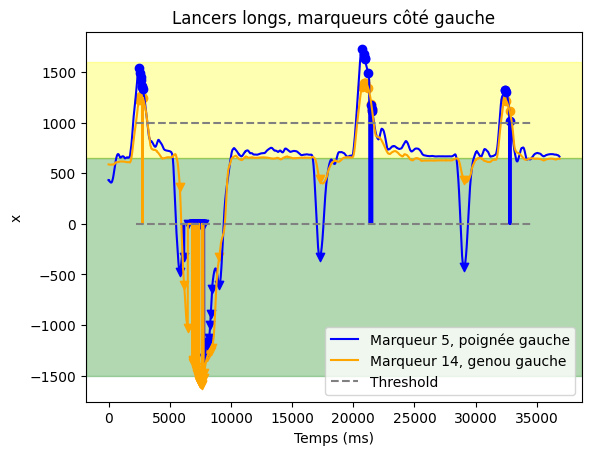

Moyenne des différences entre les minimum : 514.2113333333333
Moyenne des différences entre les extréma : -140.37894736842108


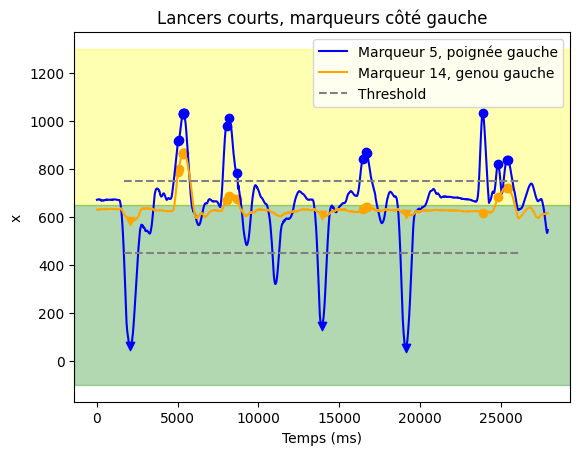

In [37]:
l=splitmatrix("groupe3_004_2023_11_23_Marker.txt")[0]

M5=l[3]
x5=M5[0]

M14= l[11]
x14 = M14[0]


all_peaks_indices, peaks_M5, peaks_M14, average_differencepeaksM5M14 =extract_local_maxima_time_differences(x5, x14)

all_minima_indices=extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=320)[0]
minima_M5= -extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=320)[1]
minima_M14 = -extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=320)[2]
average_difference_between_minimaM5M14=-extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=320)[3]

temps = [i*10 for i in range(0,len(x14))]

print ("Moyenne des différences entre les minimum :", average_difference_between_minimaM5M14)
print ("Moyenne des différences entre les extréma :",average_differencepeaksM5M14)

plt.axhspan(650, 1600, color='yellow', alpha=0.3) #, label='mouvement à droite '
plt.axhspan(-1500, 649 , color='green', alpha=0.3) #, label='mouvement à gauche'
# j'ai pas éverifié si c'était bien en haut = moivement à droite et vice versa

plt.plot(temps, x5, label = 'Marqueur 5, poignée gauche', color='blue')
plt.plot(temps, x14, label = 'Marqueur 14, genou gauche', color='orange')
plt.scatter(all_peaks_indices*10, peaks_M14, color='orange')#, label='Pics M14, à droite'
plt.scatter(all_peaks_indices*10, peaks_M5, color='blue') #, label='Pics M5, à droite'
plt.scatter(all_minima_indices*10, minima_M14, color='orange', marker ="v") #label='Pics M14, à droite',
plt.scatter(all_minima_indices*10, minima_M5, color='blue', marker ="v") #label='Pics M5, à droite'
plt.axhline(y=0, xmin=0.1, xmax=0.9, color='grey', linestyle='--', label='Threshold')
plt.axhline(y=1000, xmin=0.1, xmax=0.9, color='grey', linestyle='--')


plt.title ('Lancers longs, marqueurs côté gauche')
plt.xlabel('Temps (ms)')
plt.ylabel('x')
plt.legend()
plt.show()





l=splitmatrix("groupe3_003_2023_11_23_Marker.txt")[0]

M5=l[3]
x5=M5[0]
M14= l[11]
x14 = M14[0]

temps = [i*10 for i in range(0,len(x5))]

all_peaks_indices, peaks_M5, peaks_M14, average_differencepeaksM7M18 =extract_local_maxima_time_differences(x5, x14, 750)

all_minima_indices=extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=-200)[0]
minima_M5= -extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=-200)[1]
minima_M14 = -extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=-200)[2]
average_difference_between_minimaM5M14 =-extract_local_maxima_time_differences(-x5, -x14, thresholdchoice=-200)[3]


print ("Moyenne des différences entre les minimum :", average_difference_between_minimaM5M14)
print ("Moyenne des différences entre les extréma :",average_differencepeaksM5M14)

plt.axhspan(650, 1300, color='yellow', alpha=0.3) #, label='mouvement à droite '
plt.axhspan(-100, 649 , color='green', alpha=0.3) #, label='mouvement à gauche'
# j'ai pas éverifié si c'était bien en haut = moivement à droite et vice versa

plt.plot(temps, x5, label = 'Marqueur 5, poignée gauche', color='blue')
plt.plot(temps, x14, label = 'Marqueur 14, genou gauche', color='orange')
plt.scatter(all_peaks_indices*10, peaks_M14, color='orange')#, label='Pics M14, à droite'
plt.scatter(all_peaks_indices*10, peaks_M5, color='blue') #, label='Pics M5, à droite'
plt.scatter(all_minima_indices*10, minima_M14, color='orange', marker ="v") #label='Pics M18, à gauche',
plt.scatter(all_minima_indices*10, minima_M5, color='blue', marker ="v") #label='Pics M7, à gauche'
plt.axhline(y=450, xmin=0.1, xmax=0.9, color='grey', linestyle='--', label='Threshold')
plt.axhline(y=750, xmin=0.1, xmax=0.9, color='grey', linestyle='--')


plt.title ('Lancers courts, marqueurs côté gauche')
plt.xlabel('Temps (ms)')
plt.ylabel('x')
plt.legend()
plt.show()
